<a href="https://colab.research.google.com/github/LAMBARAA-Abdellah/mall-customers-acp-kmeans/blob/main/mall_customers_acp_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARTIE 1 — ACP (Analyse en Composantes Principales)**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


1. Importer les bibliothèques

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


2. read data

In [9]:
data = pd.read_csv(list(uploaded.keys())[0], sep=';')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. Sélectionner les variables numériques

In [8]:
data_num = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
data_num.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


4. Normalisation des données

In [10]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(
    scaler.fit_transform(data_num),
    columns=data_num.columns
)
data_scaled.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


5. Fonction ACP manuelle

In [11]:
def ACP_custom(data):
    # matrice de corrélation
    R = np.corrcoef(data.T)

    # valeurs propres + vecteurs propres
    eig_vals, eig_vecs = np.linalg.eig(R)

    # tri décroissant
    idx = eig_vals.argsort()[::-1]
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:, idx]

    # variance expliquée
    var_exp = eig_vals / eig_vals.sum()

    # projection sur 2 axes
    Y = np.dot(data, eig_vecs[:, :2])

    return eig_vals, eig_vecs, var_exp, Y


6. Exécuter l’ACP personnalisée

In [12]:
eig_vals, eig_vecs, var_exp, Y_custom = ACP_custom(data_scaled)

print("Valeurs propres :", eig_vals)
print("Variance expliquée :", var_exp)


Valeurs propres : [1.32798502 0.99925135 0.67276363]
Variance expliquée : [0.44266167 0.33308378 0.22425454]


7. ACP avec sklearn

In [13]:
pca = PCA(n_components=2)
Y_sklearn = pca.fit_transform(data_scaled)

print("Variance expliquée sklearn :", pca.explained_variance_ratio_)


Variance expliquée sklearn : [0.5002501  0.25327226]


8. Comparaison visuelle

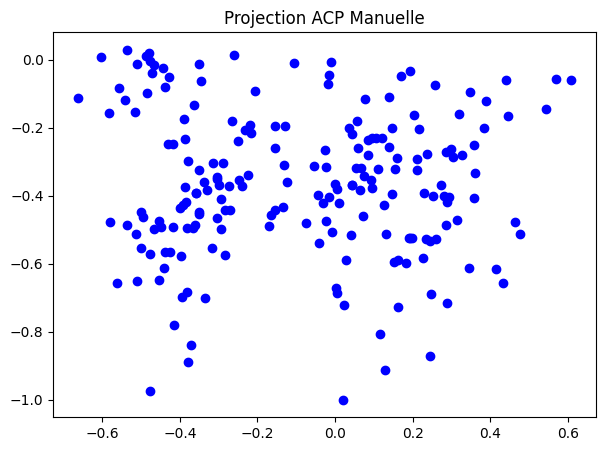

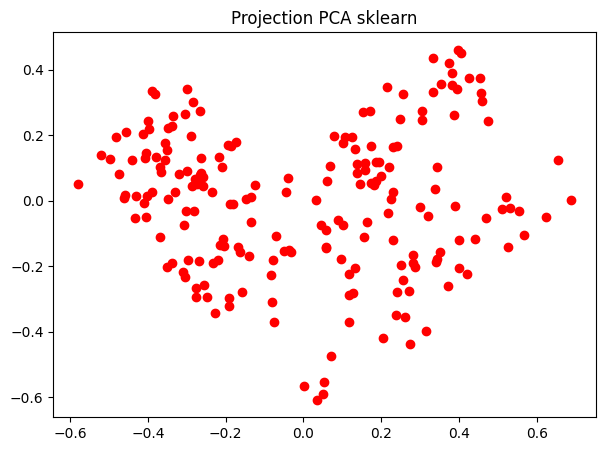

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(Y_custom[:,0], Y_custom[:,1], color='blue', label="ACP Custom")
plt.title("Projection ACP Manuelle")
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], color='red', label="PCA sklearn")
plt.title("Projection PCA sklearn")
plt.show()


**PARTIE 2 — K-Means Clustering**

1. Importer bibliothèques

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score


2. Tester K-means (random vs k-means++)

In [16]:
scores_random = []
scores_plus = []
K = range(2, 9)

for k in K:
    # init random
    model_random = KMeans(n_clusters=k, init='random', n_init=10)
    labels_random = model_random.fit_predict(data_scaled)
    scores_random.append(calinski_harabasz_score(data_scaled, labels_random))

    # init k-means++
    model_plus = KMeans(n_clusters=k, init='k-means++', n_init=10)
    labels_plus = model_plus.fit_predict(data_scaled)
    scores_plus.append(calinski_harabasz_score(data_scaled, labels_plus))


3. Afficher l’indice Calinski-Harabasz

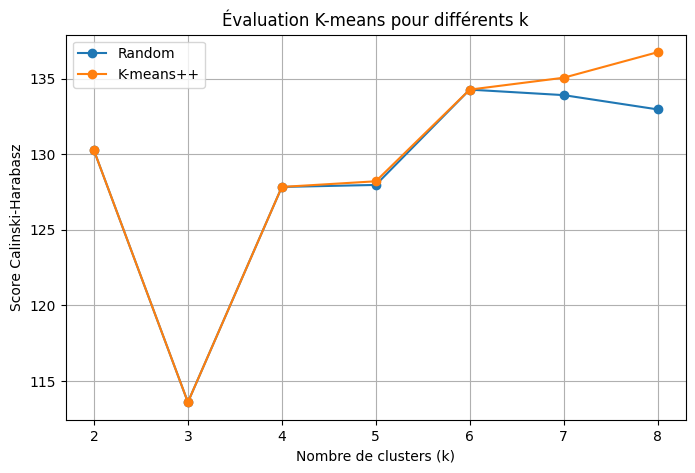

In [17]:
plt.figure(figsize=(8,5))
plt.plot(K, scores_random, marker='o', label="Random")
plt.plot(K, scores_plus, marker='o', label="K-means++")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score Calinski-Harabasz")
plt.title("Évaluation K-means pour différents k")
plt.legend()
plt.grid()
plt.show()


4. Choisir le meilleur modèle (k = 5)

In [18]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, init='k-means++', n_init=20)
labels = kmeans.fit_predict(data_scaled)
data['Cluster'] = labels

data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


5. Visualisation des clusters

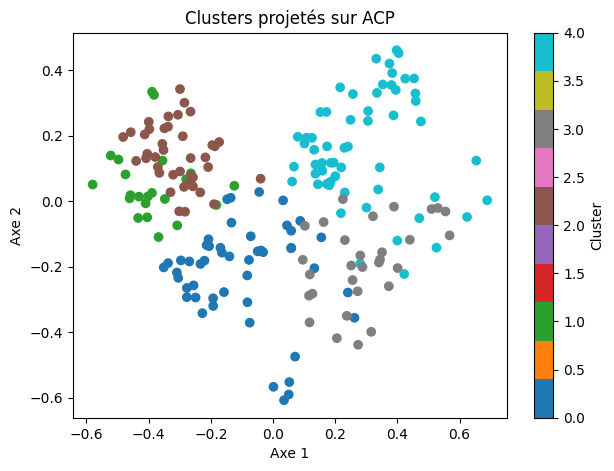

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=labels, cmap="tab10")
plt.title("Clusters projetés sur ACP")
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.colorbar(label="Cluster")
plt.show()
